<a href="https://colab.research.google.com/github/Carlys222/UNIDAD-1/blob/main/EXAMEN_PRACTICO_UNIDAD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Carlys222/UNIDAD-1/refs/heads/main/mental_health.csv')
df.head(10)

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
5,Afghanistan,AFG,1995,0.219409,4.978228,4.668100,0.699768,0.108507
6,Afghanistan,AFG,1996,0.218465,4.981489,4.665759,0.699650,0.105269
7,Afghanistan,AFG,1997,0.217286,4.987593,4.665013,0.699597,0.101531
8,Afghanistan,AFG,1998,0.216074,4.996858,4.668240,0.699765,0.098050
9,Afghanistan,AFG,1999,0.215068,5.004257,4.673557,0.700054,0.095723


coeficiente de correlacion: -0.0484

coeficiente de determinacion:  0.0023

intervalo de confianza pra b0 de  95%
 8.8563 < b0 <  19.7237
intervalo de confianza para b1 de  95%
-0.0080 < b1 < -0.0025
valor p de shapiro:  0.0000

valor p de breuschpagan:  0.4459



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6150.
  res = hypotest_fun_out(*samples, **kwds)


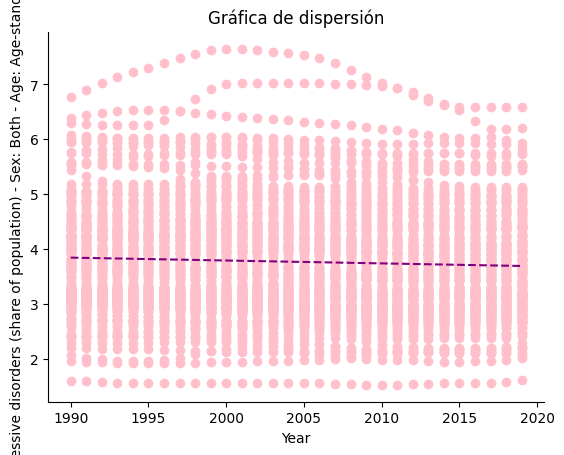

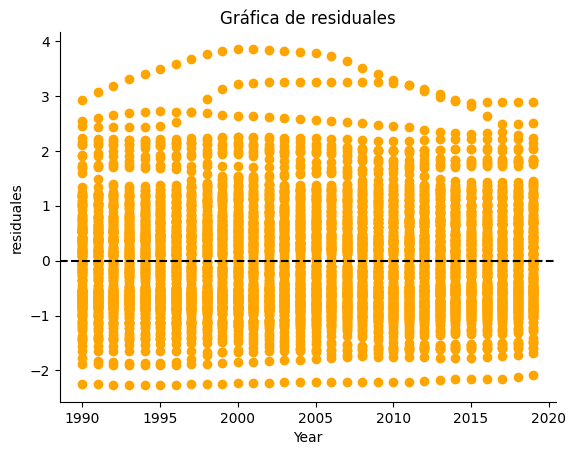

In [59]:
# a) hipótesis de causalidad: Redacta una hipótesis sobre la causalidad entre las dos variables, a su vez, establece la variable dependiente y la variable independiente.
"A medida que pasa el tiempo (Year), la prevalencia de trastornos depresivos ha aumentado debido a factores sociales, económicos y tecnológicos que han cambiado la vida cotidiana."

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Carlys222/UNIDAD-1/refs/heads/main/mental_health.csv')
df.dropna(inplace=True)
df.head()
X = df["Year"] # Variable independiente
Y = df["Depressive disorders (share of population) - Sex: Both - Age: Age-standardized"] # Variable dependiente

# b) recta de regresión ajustada: Realiza los cálculos necesarios para encontrar la recta de regresión ajustada. Incluye los procedimientos que te llevaron a la recta de regresión
import statsmodels.api as sm
X_Constante = sm.add_constant(X)
modelo = sm.OLS(Y, X_Constante).fit()

b0, b1 = modelo.params

Fun = lambda X: b0 + b1 * X

Yc = Fun(X)

plt.plot(X, Yc, color = 'purple', linestyle = '--')

# c) grafica los puntos y la recta de regresión
import matplotlib.pyplot as plt
plt.scatter(X, Y, color = 'pink')
plt.xlabel('Year')
plt.ylabel('Depressive disorders (share of population) - Sex: Both - Age: Age-standardized')
plt.title('Gráfica de dispersión')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# d) Coeficiente de correlación y determinación: Realiza los cálculos necesarios para obtener la r de Pearson y el coeficiente de determinación. Incluye dichos cálculos
from scipy.stats import pearsonr
r,_ = pearsonr(X, Y)
print(f'coeficiente de correlacion: {r: 0.4f}\n')
print(f'coeficiente de determinacion: {r ** 2: 0.4f}\n')

# e) Interpreta los resultados del coeficiente de correlación y el coeficiente de determinación.
# Coeficiente de correlacion: El coeficiente de correlación de -0.0484 indica una relación negativa entre las variables estudiadas
# Coeficiente de determinacion:   0.0023 Un coeficiente de  determinacion bajo (cercano a 0) sugiere que el modelo explica una pequeña proporción de la variabilidad en la variable dependiente. Esto indica que el modelo no se ajusta bien a los datos y puede no ser útil para hacer predicciones.

# f) Calcula el intervalo de confianza del 95% para β_1 y β_0 ¿Qué dice el intervalo de confianza a la posibilidad de que β_1 sea igual a cero?
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b0 = intervalo_de_confianza.iloc[0]
print(f'intervalo de confianza pra b0 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b0[0]: 0.4f} < b0 < {intervalo_de_confianza_b0[1]: 0.4f}')

intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}')

# Como en el intervalo de confianza no incluye el valor 0 se puede rechazar la posibilidad de que b1=0.


# Realiza el gráfico de los residuales: A partir de este gráfico, menciona si los datos cumplen con los supuestos para la regresión: linealidad, normalidad en torno a la recta, homoscedasticidad (hay más, pero con estas nos bastan)
residuales = modelo.resid
plt.figure()
plt.scatter(X, residuales, color = 'orange')
plt.xlabel('Year')
plt.ylabel('residuales')
plt.title('Gráfica de residuales')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y = 0, color = 'black', linestyle = '--')

from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor p de shapiro: {valor_p_sh: 0.4f}\n')

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(modelo.resid, X_Constante)
print(f'valor p de breuschpagan: {valor_p_bp: 0.4f}\n')

# Linealidad: la linealidad no se cumple completamente ya que se dispersan de forma no es del todo aletorias
# Normalidad en torno a la recta: No se cumple (residuos no siguen distribución normal).
# Homoscedasticidad: si se cumple ya que La prueba de Breusch-Pagan da un p-valor = 0.4459, lo que indica que los residuos tienen varianza constante.


